# Exoplanet Identifier 
## Determine if a planet is an exoplanet, potential exoplanet or not

This is my first machine learning project so I can learn\
Lets see how this goes

This cell contains the main imported libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Load the exoplanet data to a dataframe
For this I will use pandas read_csv() function to load the csv file to a pandas dataframe object and remove the basic redundant data(ID and names)

In [7]:
exoplanet_df = pd.read_csv("exoplanets_data.csv")
exoplanet_df.drop(columns=["kepid", "kepoi_name"], inplace=True)
print(exoplanet_df.head())
print(exoplanet_df.info())


   koi_disposition  koi_score  koi_period  koi_prad  koi_teq  koi_insol  \
0                2      1.000    9.488036      2.26    793.0      93.59   
1                2      0.969   54.418383      2.83    443.0       9.11   
2                1      0.000   19.899140     14.60    638.0      39.30   
3                0      0.000    1.736952     33.46   1395.0     891.96   
4                2      1.000    2.525592      2.75   1406.0     926.16   

   koi_steff  koi_srad  koi_slogg  koi_kepmag  
0     5455.0     0.927      4.467      15.347  
1     5455.0     0.927      4.467      15.347  
2     5853.0     0.868      4.544      15.436  
3     5805.0     0.791      4.564      15.597  
4     6031.0     1.046      4.438      15.509  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  9564 non-null   int64  
 1   koi_score  

## Visualize the raw data

### Initial plotting
Now that the csv has been loaded into a dataframe I want to graph it\
I want to see any patterns or outliers in the dataset

koi_disposition histogram


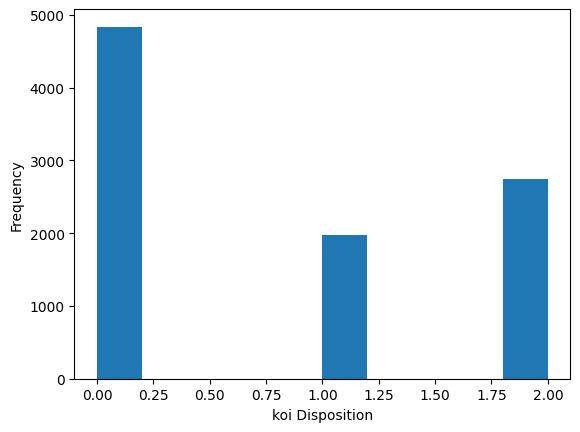

koi_score histogram


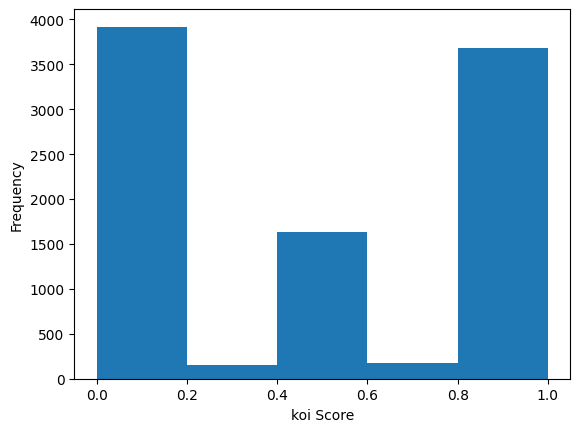

koi_period histogram


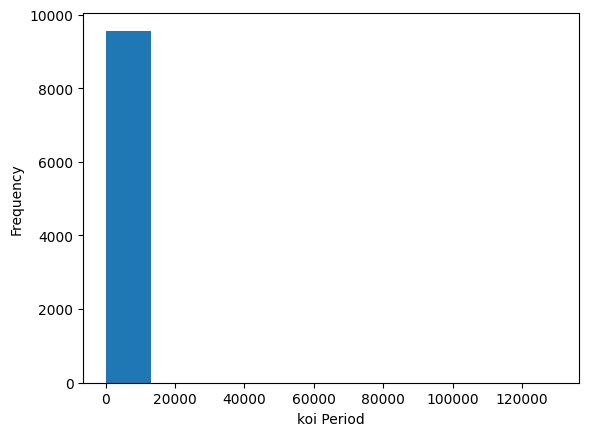

koi_prad histogram


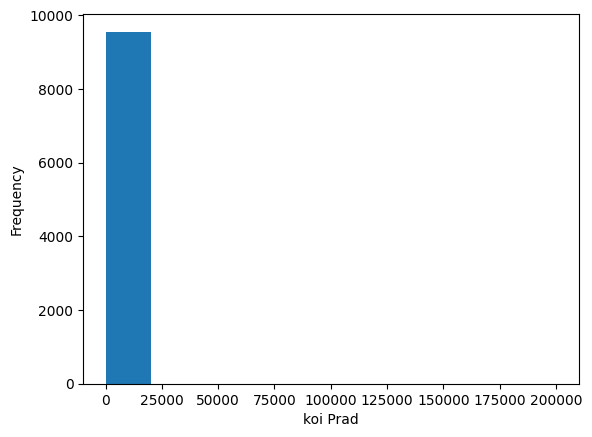

koi_teq histogram


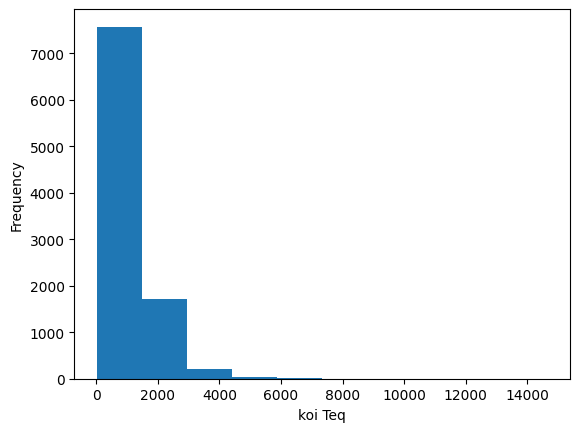

koi_insol histogram


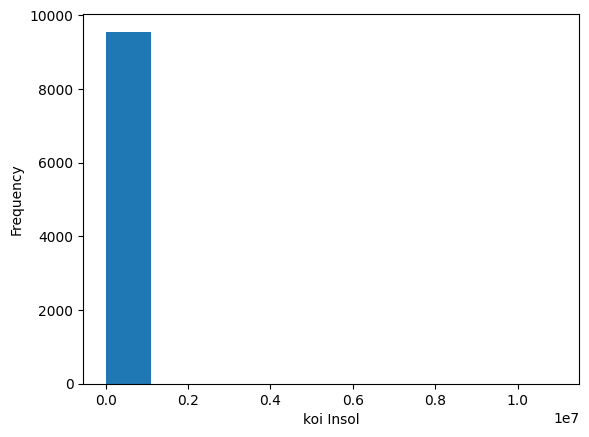

koi_steff histogram


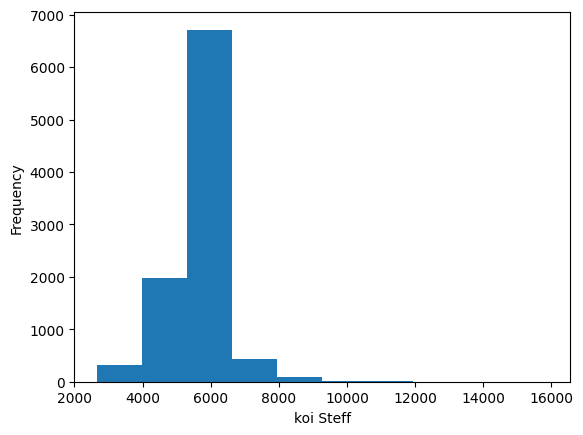

koi_srad histogram


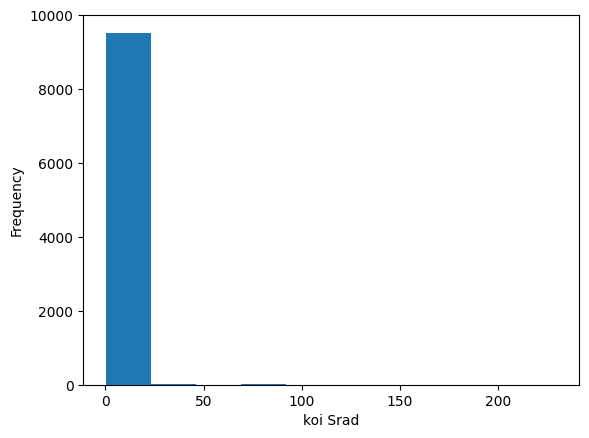

koi_slogg histogram


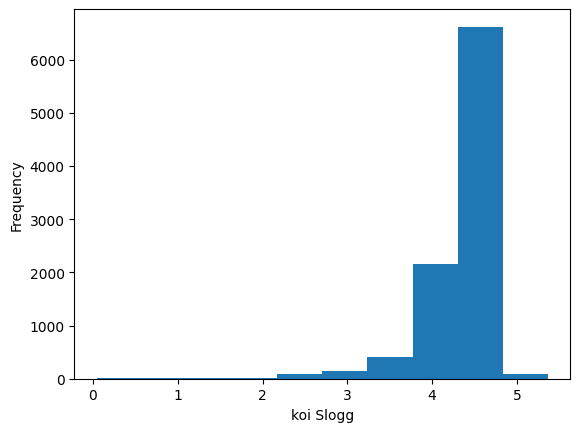

koi_kepmag histogram


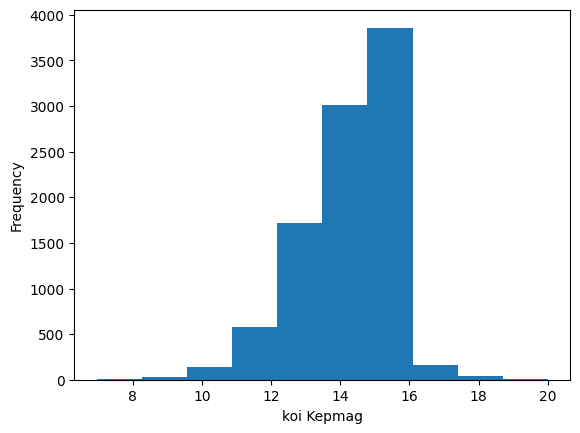

In [8]:
print("koi_disposition histogram")
plt.hist(exoplanet_df["koi_disposition"], bins=10)
plt.xlabel("koi Disposition")
plt.ylabel("Frequency")
plt.show()

print("koi_score histogram")
plt.hist(exoplanet_df["koi_score"], bins=5)
plt.xlabel("koi Score")
plt.ylabel("Frequency")
plt.show()  

print("koi_period histogram")
plt.hist(exoplanet_df["koi_period"], bins=10)
plt.xlabel("koi Period")
plt.ylabel("Frequency")
plt.show()  

print("koi_prad histogram")
plt.hist(exoplanet_df["koi_prad"], bins=10)
plt.xlabel("koi Prad")
plt.ylabel("Frequency")
plt.show()  

print("koi_teq histogram")  
plt.hist(exoplanet_df["koi_teq"], bins=10)
plt.xlabel("koi Teq")
plt.ylabel("Frequency")
plt.show()  

print("koi_insol histogram")
plt.hist(exoplanet_df["koi_insol"], bins=10)
plt.xlabel("koi Insol")
plt.ylabel("Frequency")
plt.show() 

print("koi_steff histogram")
plt.hist(exoplanet_df["koi_steff"], bins=10)
plt.xlabel("koi Steff")
plt.ylabel("Frequency")
plt.show()  

print("koi_srad histogram")
plt.hist(exoplanet_df["koi_srad"], bins=10)
plt.xlabel("koi Srad")
plt.ylabel("Frequency") 
plt.show()

print("koi_slogg histogram")
plt.hist(exoplanet_df["koi_slogg"], bins=10)
plt.xlabel("koi Slogg")
plt.ylabel("Frequency")
plt.show()

print("koi_kepmag histogram")
plt.hist(exoplanet_df["koi_kepmag"], bins=10)
plt.xlabel("koi Kepmag")        
plt.ylabel("Frequency")
plt.show()  

### After plotting thoughts

So keep in mind

**0 is a candidate exoplanet**\
**1 is a confirmed candidate**\
**2 is a false positive**

From the looks of this data the potential exoplanets have High data features and the confirmed exoplanets have a middle bright host star\
the false positives have a high slogg value,\
I may be not looking at it right but for now that is what I think is going on\

Any changes to my analysis will be added here:

Ok so first things first, I have a weak initial hypothesis but thats ok\
Now I want to group features with each other to find more correlations 


### Now I want the means, medians, modes, std deviation, etc

In [188]:
print("Mean: ")
exoplanet_mean = exoplanet_df.mean()
print(exoplanet_mean)
print("Medians: ")
exoplanet_df_median = exoplanet_df.median()
print(exoplanet_df_median)
print("Modes: ")
exoplanet_df_mode = exoplanet_df.mode()
print(exoplanet_df_mode)    
print("Standard Deviations: ")
exoplanet_df_std_dev = exoplanet_df.std()
print(exoplanet_df_std_dev)

Mean: 
koi_disposition       0.780845
koi_score             0.480829
koi_period           75.671358
koi_prad            102.891778
koi_teq            1085.385828
koi_insol          7745.737023
koi_steff          5706.823280
koi_srad              1.728712
koi_slogg             4.310157
koi_kepmag           14.264606
dtype: float64
Medians: 
koi_disposition       0.000000
koi_score             0.480829
koi_period            9.752831
koi_prad              2.490000
koi_teq             906.000000
koi_insol           158.320000
koi_steff          5745.000000
koi_srad              1.006500
koi_slogg             4.432000
koi_kepmag           14.520000
dtype: float64
Modes: 
      koi_disposition  koi_score     koi_period    koi_prad      koi_teq  \
0                 0.0        0.0       0.241843  102.891778  1085.385828   
1                 NaN        NaN       0.259820         NaN          NaN   
2                 NaN        NaN       0.293630         NaN          NaN   
3                 NaN

                koi_score                                                     \
                    count      mean       std  min       25%     50%     75%   
koi_disposition                                                                
0                  4839.0  0.119806  0.223752  0.0  0.000000  0.0000  0.0795   
1                  1982.0  0.701644  0.297904  0.0  0.480829  0.8015  0.9890   
2                  2743.0  0.958167  0.149615  0.0  0.991000  1.0000  1.0000   

                     koi_period              ... koi_slogg        koi_kepmag  \
                 max      count        mean  ...       75%    max      count   
koi_disposition                              ...                               
0                1.0     4839.0   65.138933  ...     4.529  5.283     4839.0   
1                1.0     1982.0  167.693452  ...     4.537  5.364     1982.0   
2                1.0     2743.0   27.759807  ...     4.557  5.274     2743.0   

                                      

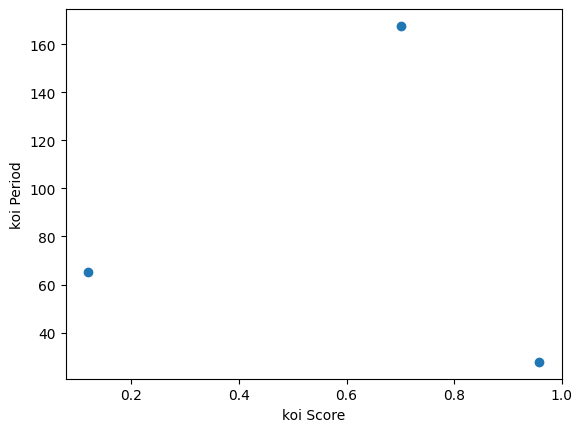

In [9]:
# First I want to group the data by koi_disposition
grouped = exoplanet_df.groupby("koi_disposition")
print(grouped.describe())

plt.scatter(grouped["koi_score"].mean(), grouped["koi_period"].mean())
plt.xlabel("koi Score")
plt.ylabel("koi Period")
plt.show()



## Data Preprocessing
This step is fun because once again I am a retard and can function \
So I have no idea what or how imma do this
As I do this project Imma use the markdown to kind of tell my thoughts and see how\
shit evolves. 
### Clean The Data
So first I have to clean the data(remove duplicates, handle missing values, etc)\
That is what is going on here, after this I will move on to normalizing the data\

First I want to handle missing data and there are two ways to do it:

> Impute missing values with mean values(fill in the missing values with the average value for that column)\
> Completely remove the row with missing data

Im going to try both ways and see which one works best **for this data set**


In [190]:
# Create variable to store dataframe with removed rows
exoplanet_df_no_rows = exoplanet_df.copy()

# Create variable to store dataframe with imputed values
exoplanet_df_imputed = exoplanet_df.copy()

### Remove rows from dataframe
if there is a row with missing data remove the row

In [191]:
# find if rows are missing data
missing_data = exoplanet_df.isnull().any()
print(missing_data)

koi_disposition    False
koi_score          False
koi_period         False
koi_prad           False
koi_teq            False
koi_insol          False
koi_steff          False
koi_srad           False
koi_slogg          False
koi_kepmag         False
dtype: bool


Ok I don't have to remove rows or fill in columns which is nice \
And all redundant data was removed at the start

Now I have the indexes to work with 

### Data Normalizing
Ok kewl, now I have no missing data, and redundent data is gone\
next I want to normalize/scale the data

I am going to normalize the data using the Min-Max equation:  x<sub>norm</sub> = (x - x <sub>min</sub> )  /  (x<sub>max</sub> - x <sub>min</sub>)
There are modules for this but I want to do it manually so I can better understand what is going on


In [11]:
# Get the necessary data for normalization 
# First get the minimum and maximum values of the columns 
min_values = exoplanet_df.min()
max_values = exoplanet_df.max()
print(f"Minimum Values:\n {min_values}\n")
print(f"Maximum Values:\n {max_values}\n")

# Find the range of each column
range_values = max_values - min_values
print(f"Range of Values:\n{range_values}\n")

# normalize the data
exoplanet_df_normalized = (exoplanet_df - min_values) / range_values
print("the unnormalized data is:")
print(exoplanet_df.head())
print("\n")
print("The normalized data is:")
print(exoplanet_df_normalized.head())

Minimum Values:
 koi_disposition       0.000000
koi_score             0.000000
koi_period            0.241843
koi_prad              0.080000
koi_teq              25.000000
koi_insol             0.000000
koi_steff          2661.000000
koi_srad              0.109000
koi_slogg             0.047000
koi_kepmag            6.966000
dtype: float64

Maximum Values:
 koi_disposition    2.000000e+00
koi_score          1.000000e+00
koi_period         1.299958e+05
koi_prad           2.003460e+05
koi_teq            1.466700e+04
koi_insol          1.094755e+07
koi_steff          1.589600e+04
koi_srad           2.299080e+02
koi_slogg          5.364000e+00
koi_kepmag         2.000300e+01
dtype: float64

Range of Values:
koi_disposition    2.000000e+00
koi_score          1.000000e+00
koi_period         1.299955e+05
koi_prad           2.003459e+05
koi_teq            1.464200e+04
koi_insol          1.094755e+07
koi_steff          1.323500e+04
koi_srad           2.297990e+02
koi_slogg          5.317000e+00

## Visualizing the normalized data

### Initial plotting
After normalizing the data I need to graph it again to make sure the distribution is still relatively the same\
To do this, I pretty much used the exact same code from before but using **exoplanet_df_normalized** to compare the raw data

koi_disposition histogram


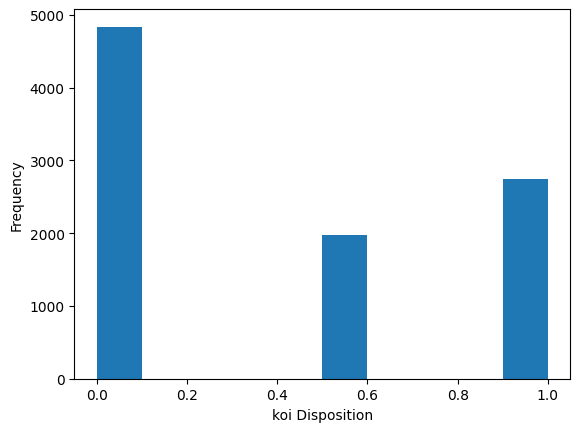

koi_score histogram


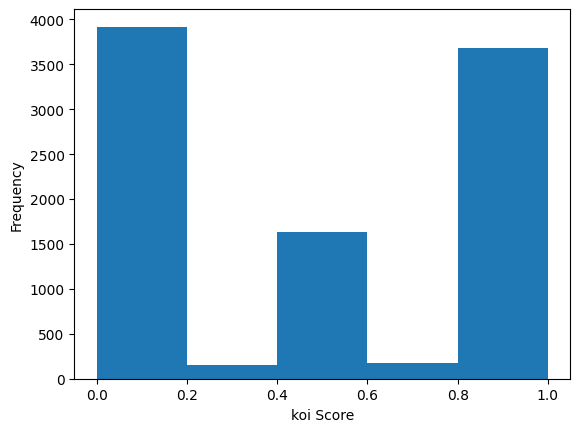

koi_period histogram


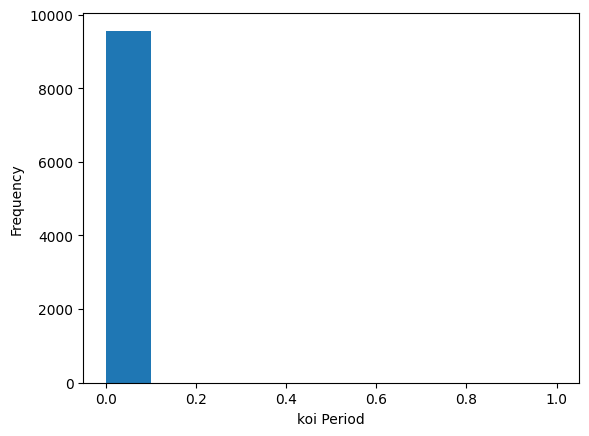

koi_prad histogram


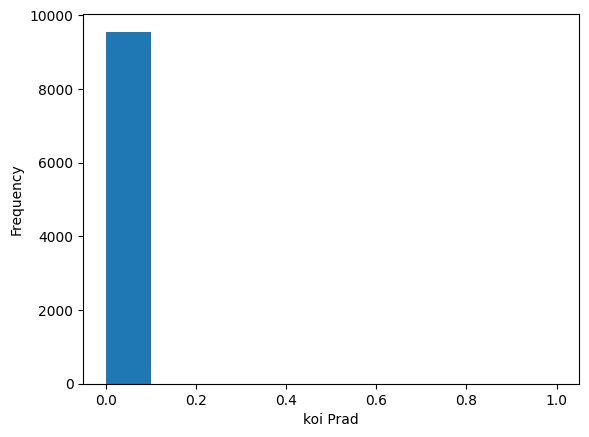

koi_teq histogram


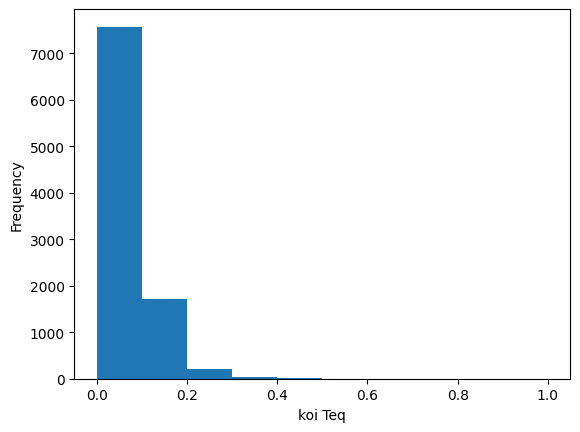

koi_insol histogram


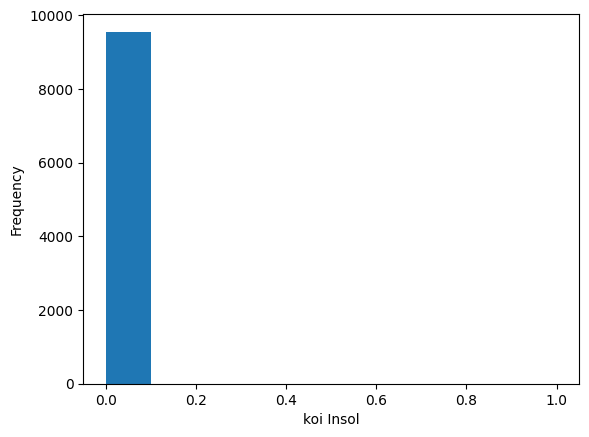

koi_steff histogram


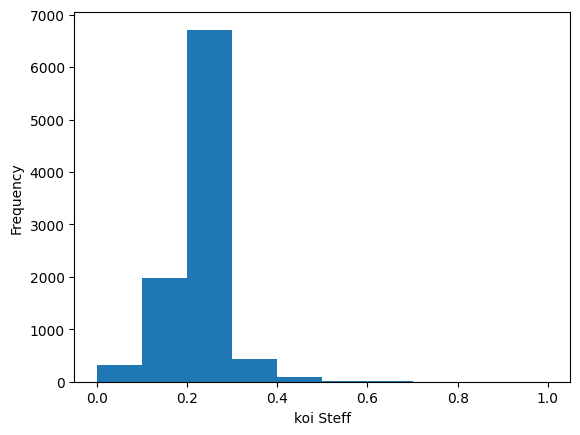

koi_srad histogram


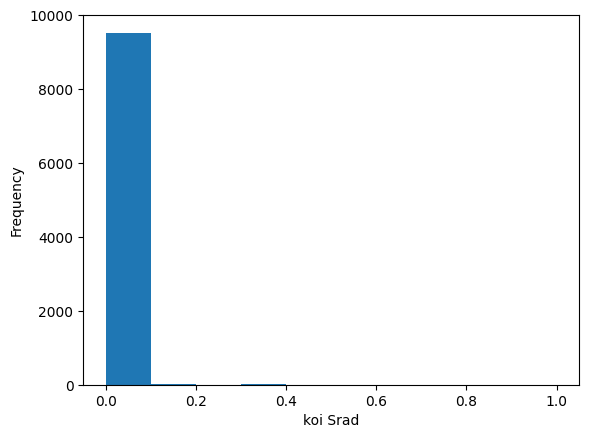

koi_slogg histogram


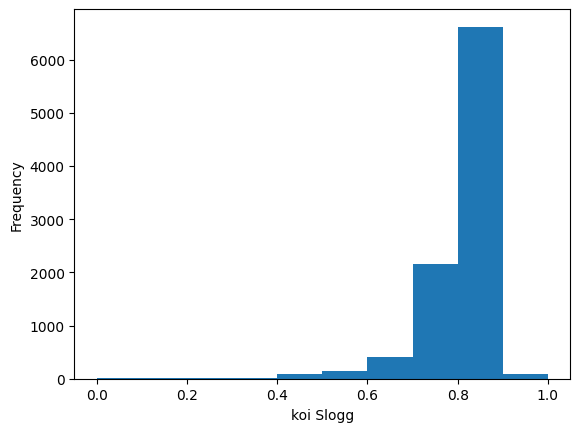

koi_kepmag histogram


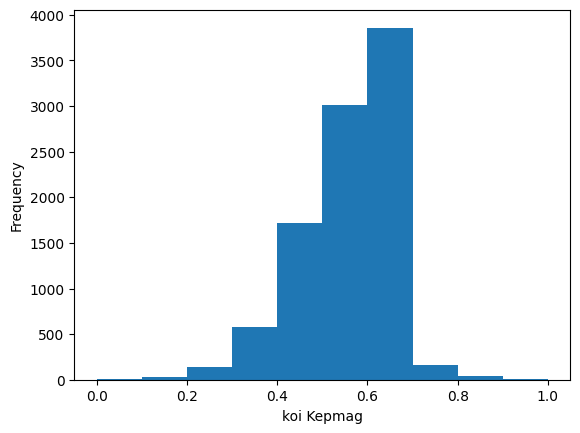

In [201]:
print("koi_disposition histogram")
plt.hist(exoplanet_df_normalized["koi_disposition"], bins=10)
plt.xlabel("koi Disposition")
plt.ylabel("Frequency")
plt.show()

print("koi_score histogram")
plt.hist(exoplanet_df_normalized["koi_score"], bins=5)
plt.xlabel("koi Score")
plt.ylabel("Frequency")
plt.show()  

print("koi_period histogram")
plt.hist(exoplanet_df_normalized["koi_period"], bins=10)
plt.xlabel("koi Period")
plt.ylabel("Frequency")
plt.show()  

print("koi_prad histogram")
plt.hist(exoplanet_df_normalized["koi_prad"], bins=10)
plt.xlabel("koi Prad")
plt.ylabel("Frequency")
plt.show()  

print("koi_teq histogram")  
plt.hist(exoplanet_df_normalized["koi_teq"], bins=10)
plt.xlabel("koi Teq")
plt.ylabel("Frequency")
plt.show()  

print("koi_insol histogram")
plt.hist(exoplanet_df_normalized["koi_insol"], bins=10)
plt.xlabel("koi Insol")
plt.ylabel("Frequency")
plt.show() 

print("koi_steff histogram")
plt.hist(exoplanet_df_normalized["koi_steff"], bins=10)
plt.xlabel("koi Steff")
plt.ylabel("Frequency")
plt.show()  

print("koi_srad histogram")
plt.hist(exoplanet_df_normalized["koi_srad"], bins=10)
plt.xlabel("koi Srad")
plt.ylabel("Frequency") 
plt.show()

print("koi_slogg histogram")
plt.hist(exoplanet_df_normalized["koi_slogg"], bins=10)
plt.xlabel("koi Slogg")
plt.ylabel("Frequency")
plt.show()

print("koi_kepmag histogram")
plt.hist(exoplanet_df_normalized["koi_kepmag"], bins=10)
plt.xlabel("koi Kepmag")        
plt.ylabel("Frequency")
plt.show()

### Visualizing the grouped data

Now after visualizing the data i want to group the data and visualize it 

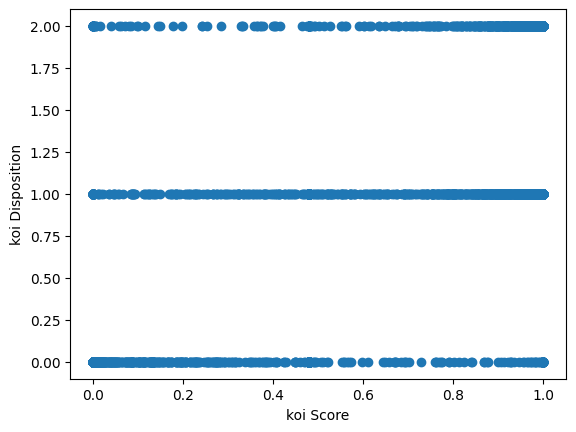

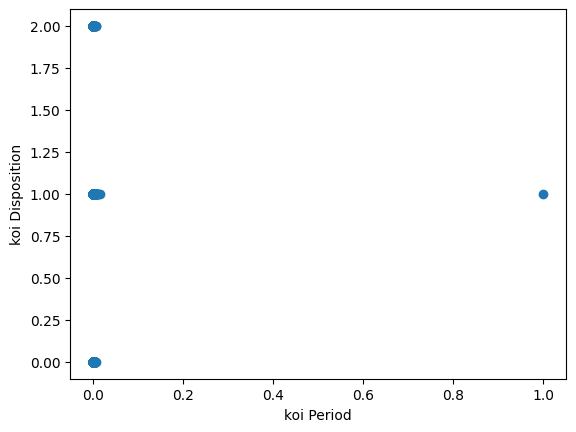

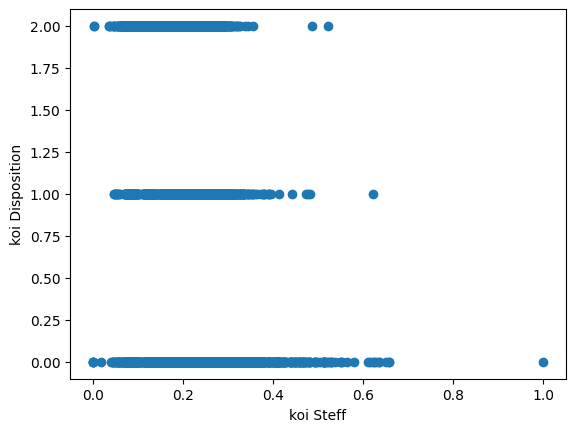

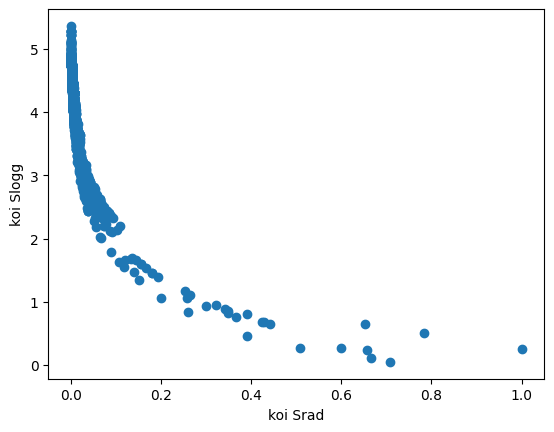

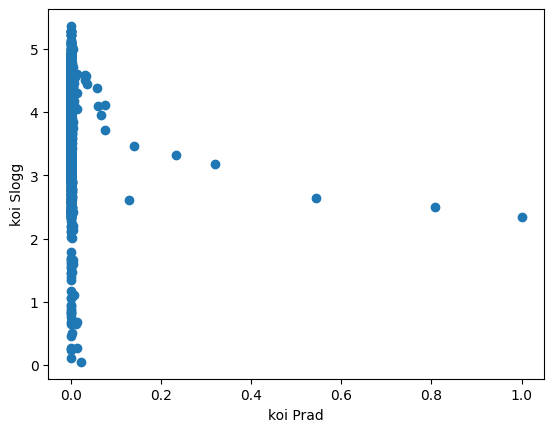

In [ ]:
print("Grouped Data")

print("koi_disposition scatter plot")
plt.plot(exoplanet_df_normalized["koi_score"], exoplanet_df["koi_disposition"], 'o')
plt.xlabel("koi Score")
plt.ylabel("koi Disposition")
plt.show()

plt.plot(exoplanet_df_normalized["koi_period"], exoplanet_df["koi_disposition"], 'o')
plt.xlabel("koi Period")
plt.ylabel("koi Disposition")
plt.show()  

plt.plot(exoplanet_df_normalized["koi_steff"], exoplanet_df["koi_disposition"], 'o')
plt.xlabel("koi Steff")
plt.ylabel("koi Disposition")
plt.show()

plt.plot(exoplanet_df_normalized["koi_srad"], exoplanet_df["koi_slogg"], 'o')
plt.xlabel("koi Srad")
plt.ylabel("koi Slogg")
plt.show()

# group koi_prad by koi_slogg 
plt.scatter(exoplanet_df_normalized["koi_prad"], exoplanet_df["koi_slogg"])
plt.xlabel("koi Prad")
plt.ylabel("koi Slogg")
plt.show()
